## Laptop-Price Prediction

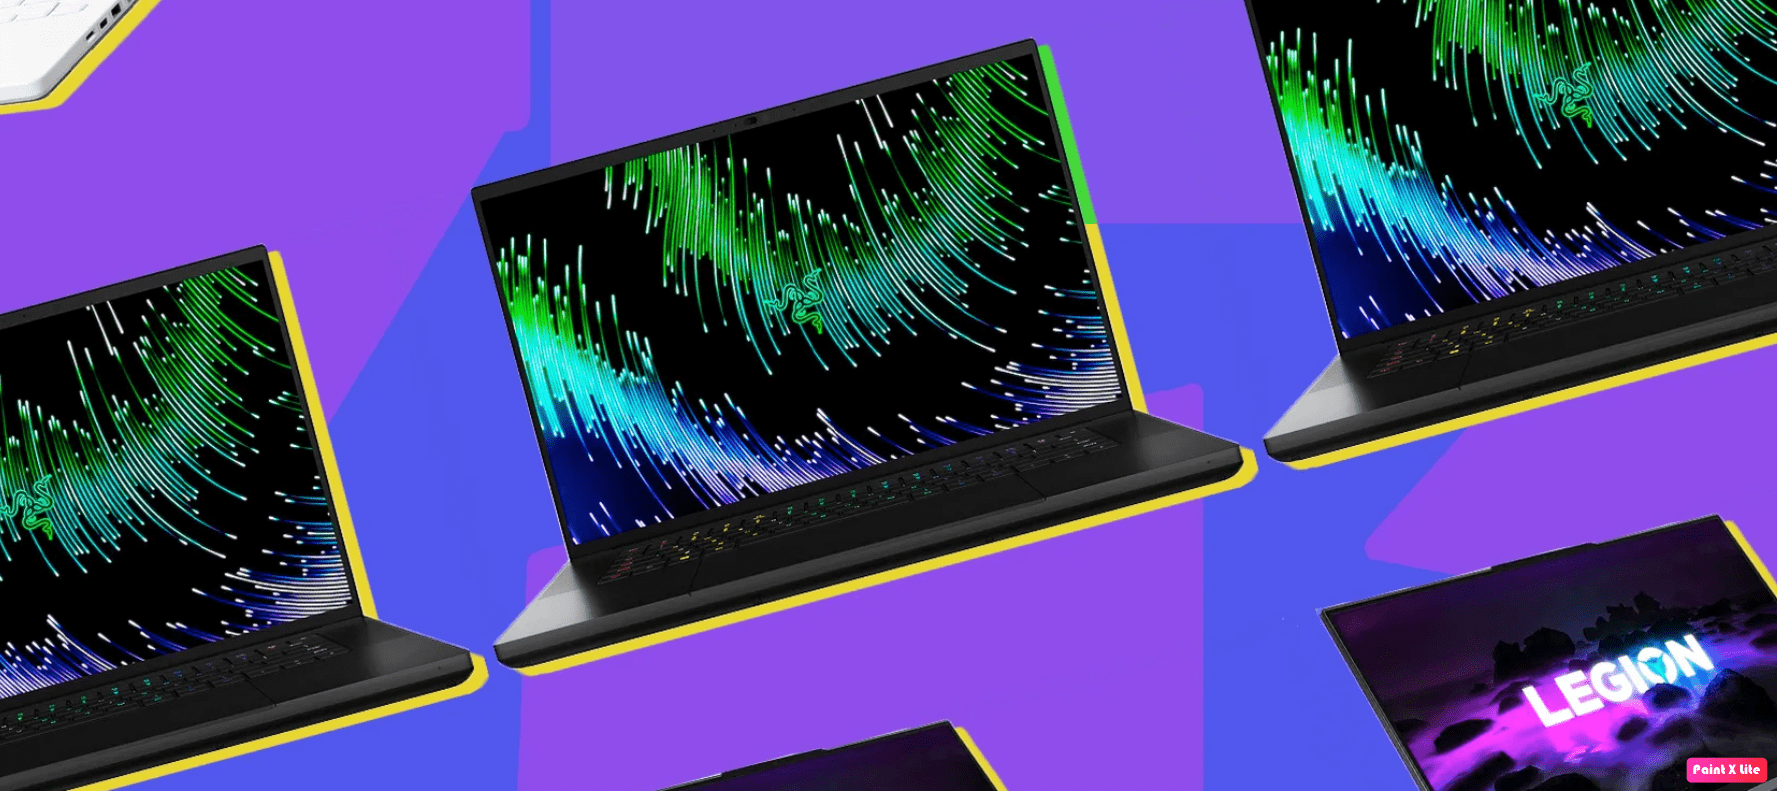

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/price-laptop/laptop_price.xlsx


In [2]:
df=pd.read_excel("/kaggle/input/price-laptop/laptop_price.xlsx")

In [3]:
df=df.drop(columns="Unnamed: 0",axis=1)

In [4]:
df.shape

(1303, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Check for duplicates

In [7]:
#subset the unique rows
a= ~df.duplicated()

In [8]:
df=df[a]

In [9]:
df.duplicated().sum() # there are no duplicates anymore.

0

In [10]:
df.shape

(1274, 11)

## Check for missing values

In [11]:
df.isnull().any() # there are no missing values

Company             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price               False
dtype: bool

## Cleaning the data

In [12]:
df['Ram']=df['Ram'].str.replace('GB','')

In [13]:
df['Weight']=df['Weight'].str.replace('kg','')

In [14]:
df['Ram']=df['Ram'].astype("int32")
df['Weight']=df['Weight'].astype("float32")

## EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

### Price

/tmp/ipykernel_20/1710318793.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


([<matplotlib.axis.XTick at 0x7efd6ce406d0>,
 [Text(0, 0, '0K'),
  Text(50000, 0, '50K'),
  Text(100000, 0, '100K'),
  Text(150000, 0, '150K'),
  Text(200000, 0, '200K'),
  Text(250000, 0, '250K'),
  Text(300000, 0, '300K'),
  Text(350000, 0, '350K')])

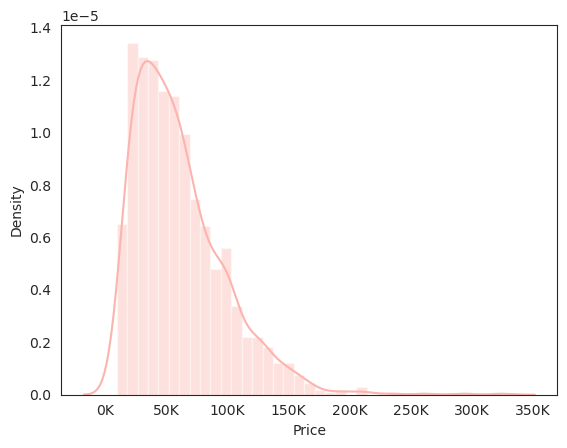

In [16]:
sns.set_style("white")
custom_palette = ['#FBB4AE']
sns.set_palette(custom_palette)
sns.distplot(df["Price"])
plt.xticks([0,50000,100000,150000,200000,250000,300000,350000],["0K","50K",'100K',"150K","200K","250K","300K","350K"])

### Companies

### Companies and their Pricing

In [17]:
category1=df['Company'].value_counts().index
list1=[]
for i in category1:
    a=i
    list1.append(a)
print(list1)


['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple', 'Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi', 'Google', 'Fujitsu', 'LG', 'Huawei']


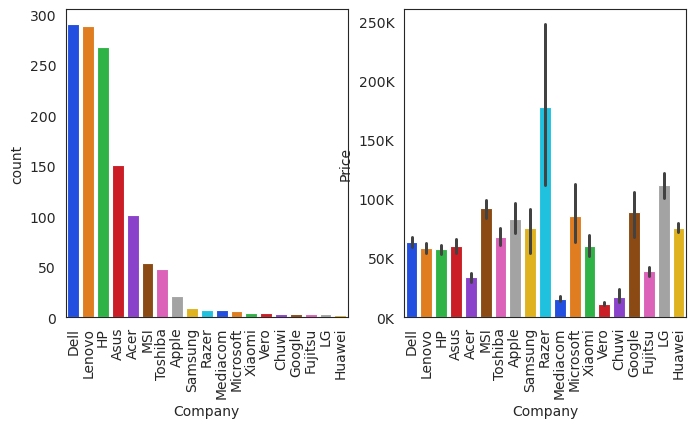

In [18]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(8,4))
sns.set_style("darkgrid")
sns.set_context("paper")
sns.countplot(x='Company',data=df,order=list1,palette=sns.color_palette('bright'),ax=ax0)
ax0.set_xticklabels(list1,rotation=90)
sns.barplot(x='Company',y="Price",data=df,order=list1,palette=sns.color_palette('bright'),ax=ax1)
ax1.set_xticklabels(list1,rotation=90)
plt.yticks([0,50000,100000,150000,200000,250000],['0K','50K','100K','150K','200K','250K'])
plt.show()

### Types of Laptop and their pricing

In [19]:
category2=df['TypeName'].value_counts().index
list2=[]
for i in category2:
    a=i
    list2.append(a)
print(list2)

['Notebook', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Workstation', 'Netbook']


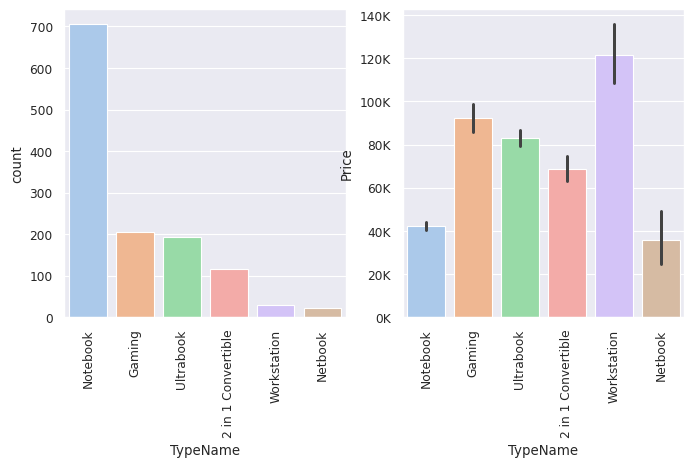

In [20]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(8,4))
sns.set_style("darkgrid")
sns.set_context("paper")
sns.countplot(x='TypeName',data=df,order=list2,palette=sns.color_palette('pastel'),ax=ax0)
ax0.set_xticklabels(list2,rotation=90)
sns.barplot(x='TypeName',y="Price",data=df,order=list2,palette=sns.color_palette('pastel'),ax=ax1)
ax1.set_xticklabels(list2,rotation=90)
plt.yticks([0,20000,40000,60000,80000,100000,120000,140000],['0K','20K','40K','60K','80K','100K','120K','140K'])
plt.show()

Notebooks are the most commom choice and have low prices.Workstation on the other hand are costly and the demand for it is less.

### Screen size

([<matplotlib.axis.YTick at 0x7efd6893f490>,
 [Text(0, 0, '0K'),
  Text(0, 100000, '100K'),
  Text(0, 200000, '200K'),
  Text(0, 300000, '300K')])

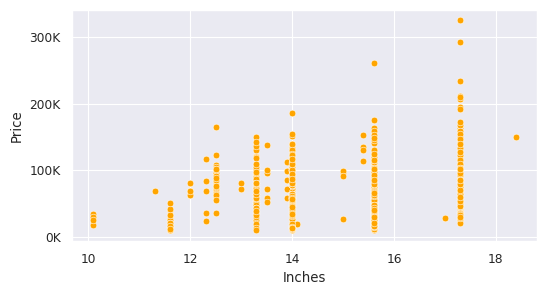

In [21]:
fig=plt.subplots(1,1,figsize=(6,3))
sns.scatterplot(x='Inches',y="Price",data=df,color='orange')
plt.yticks([0,100000,200000,300000],['0K','100K','200K','300K'])

There does not seem to be any significant relationship between screensize and price.

### Screen Resolution

In [22]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

#### Touchscreen laptops

In [23]:
# Extracting the touchscreen laptops
list_ofvalues=[]    #df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

for i in df['ScreenResolution'].values:
    if 'Touchscreen' in i:
        a=1
    else:
        a=0
    list_ofvalues.append(a)
df['Touchscreen']=list_ofvalues


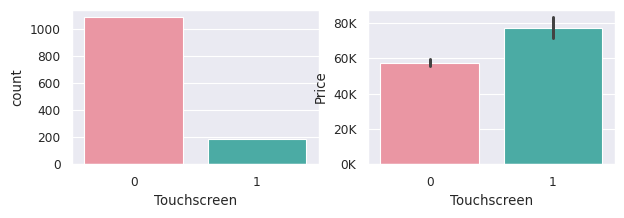

In [24]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(7,2))
sns.countplot(x='Touchscreen',data=df,ax=ax0)
sns.barplot(x='Touchscreen',y='Price',data=df,ax=ax1)
plt.yticks([0,20000,40000,60000,80000],['0K','20K','40K','60K','80K'])
plt.show()

Touch screen laptops are costly and scarce compared to normal ones.

#### IPS panel laptops

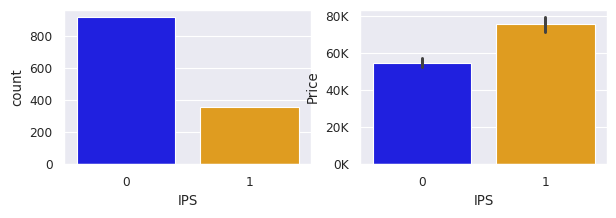

In [25]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
color=['blue','orange']
sns.set_palette(color)
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(7,2))
sns.countplot(x='IPS',data=df,ax=ax0)
sns.barplot(x='IPS',y='Price',data=df,ax=ax1)
plt.yticks([0,20000,40000,60000,80000],['0K','20K','40K','60K','80K'])
plt.show()

IPS panel laptops are costly and scarce compared to normal ones.

#### Extracting useful info from Screen resolution

In [26]:
new_df=df['ScreenResolution'].str.split('x',expand=True)
new_df

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1269,1366,768
1270,IPS Panel Full HD / Touchscreen 1920,1080
1271,IPS Panel Quad HD+ / Touchscreen 3200,1800
1272,1366,768


In [27]:
df['X_res'] = new_df[0]
df['Y_res'] = new_df[1]

In [28]:
#Extract the last 4 digits for X_res
df['X_res']=df['X_res'].apply(lambda x: x[-4:])

In [29]:
#Check if the last digits are all 4 digit numbers.If there are any three digit numbers,we will make changes accordingly.
list=[]
for i in df['X_res'].astype('str'):
    if len(i)==4:
        a=True
    else:
        a=False
    list.append(a)
list=pd.Series(list)
list.sum()
# the sum comes to 1274.it means all are 4 digit numbers.

1274

In [30]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [31]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1082,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,34433.2656,1,1,1920,1200
159,Toshiba,Notebook,15.6,1366x768,Intel Core i3 6006U 2.2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,23816.1600,0,0,1366,768
842,HP,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,48484.8000,0,0,1600,900
1254,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,23655.7872,0,0,1366,768


### Correlation of Price with features

In [32]:
df.corr()['Price']

/tmp/ipykernel_20/815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.548111
Name: Price, dtype: float64

#### The correlation of X_res and Y_res is high with price but not so with inches.We will construct a new feature call ppi from inches,X_res and Y_res to avoid multicollinearity.

In [33]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [34]:
df.corr()['Price']

/tmp/ipykernel_20/815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.548111
ppi            0.469539
Name: Price, dtype: float64

In [35]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

#### CPU

In [36]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [37]:
df['Cpu'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [38]:
df['Cpu'].head(5)

0    Intel Core i5
1    Intel Core i5
2    Intel Core i5
3    Intel Core i7
4    Intel Core i5
Name: Cpu, dtype: object

In [39]:
def type_of_proces(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [40]:
df['Cpu'] = df['Cpu'].apply(type_of_proces)

In [41]:
df['Cpu'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

#### Relation of cpu and price

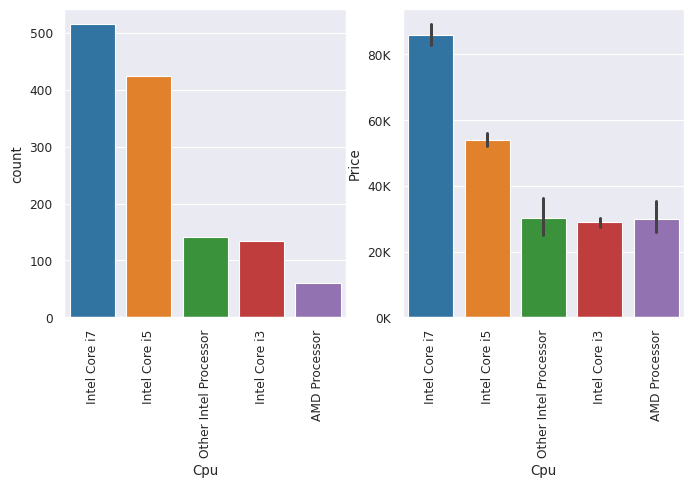

In [42]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(8,4))
sns.set_style("darkgrid")
sns.set_context("paper")
sns.countplot(x='Cpu',data=df,order=df['Cpu'].value_counts().index,palette=sns.color_palette("tab10"),ax=ax0)
ax0.set_xticklabels(df['Cpu'].value_counts().index,rotation=90)
sns.barplot(x='Cpu',y="Price",order=df['Cpu'].value_counts().index,data=df,palette=sns.color_palette("tab10"),ax=ax1)
ax1.set_xticklabels(df['Cpu'].value_counts().index,rotation=90)
plt.yticks([0,20000,40000,60000,80000],['0K','20K','40K','60K','80K'])
plt.show()

#### It seems i7 is the most popular one even though it being the most expensive.

### RAM

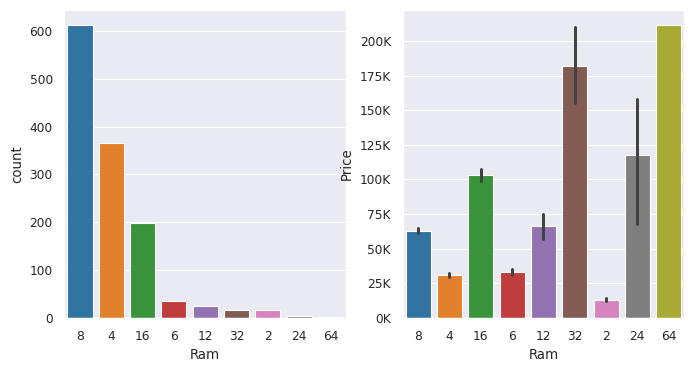

In [43]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(8,4))
sns.set_style("darkgrid")
sns.set_context("paper")
sns.countplot(x='Ram',data=df,order=df['Ram'].value_counts().index,palette=sns.color_palette("tab10"),ax=ax0)
sns.barplot(x='Ram',y="Price",order=df['Ram'].value_counts().index,data=df,palette=sns.color_palette("tab10"),ax=ax1)
plt.yticks([0,25000,50000,75000,100000,125000,150000,175000,200000],['0K','25K','50K','75K','100K','125K','150K','175K','200K'])
plt.show()

#### Ram has a clear linear relationship with Price.8GB Ram is the most popular one with affordable rates.

### Memory

In [44]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [45]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory']=df['Memory'].str.replace("GB","")
df['Memory']=df['Memory'].str.replace("TB","000")
new1=df['Memory'].str.split("+",expand=True) #splitting into two columns
new1

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,500 HDD,None
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None


In [46]:
df["first"]= new1[0]
df["second"]= new1[1]
df["first"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1269              500 HDD
1270              128 SSD
1271              512 SSD
1272     64 Flash Storage
1273             1000 HDD
Name: first, Length: 1274, dtype: object

In [47]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,128 Flash Storage,None,0,0,0,1


In [48]:
df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128 SSD,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128 Flash Storage,0,0,0,0,1,0,0,0,0


In [49]:
df['first'] = df['first'].str.replace(r'\D', '')
df['second'] = df['second'].str.replace(r'\D', '')
df.head(2)

/tmp/ipykernel_20/4222733254.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
/tmp/ipykernel_20/4222733254.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,0,0,1,0,0,0,0


In [50]:
df["first"] = df["first"].astype('int')
df["second"] = df["second"].astype('int')

In [51]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [52]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [53]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Hybrid,Flash_Storage
441,Dell,Notebook,Intel Core i5,4,256 SSD,AMD Radeon 530,Windows 10,2.20,39906.72,0,0,141.211998,0,256,0,0
245,Dell,Notebook,Intel Core i7,8,128 SSD + 2000 HDD,AMD Radeon 530,Windows 10,2.20,52480.80,0,0,141.211998,2000,128,0,0
520,Lenovo,Gaming,Intel Core i7,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,74538.72,0,1,141.211998,1000,256,0,0
893,Lenovo,Ultrabook,Intel Core i5,8,256 SSD,Intel HD Graphics 620,Windows 10,1.32,95850.72,0,1,157.350512,0,256,0,0
727,Dell,2 in 1 Convertible,Intel Core i3,4,1000 HDD,Intel HD Graphics 620,Windows 10,1.71,34578.72,1,0,165.632118,1000,0,0,0


In [54]:
df.drop(columns=['Memory'],inplace=True)

#### checking for correlations again

In [55]:
df.corr()["Price"]

/tmp/ipykernel_20/1734695575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
ppi              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

### GPU

In [56]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

#### We will only keep the brand names such as intel,nvdia and AMD.Since no info for its storage like 4GB or 2GB etc is given there is no use to keep any other info other than company name.

In [57]:
df['Gpu']=df['Gpu'].apply(lambda x: x.split()[0])
df['Gpu'].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu, dtype: int64

In [58]:
# drop ARM i.e dropping 1 row
df=df[df['Gpu'] !="ARM"]
df.shape

(1273, 15)

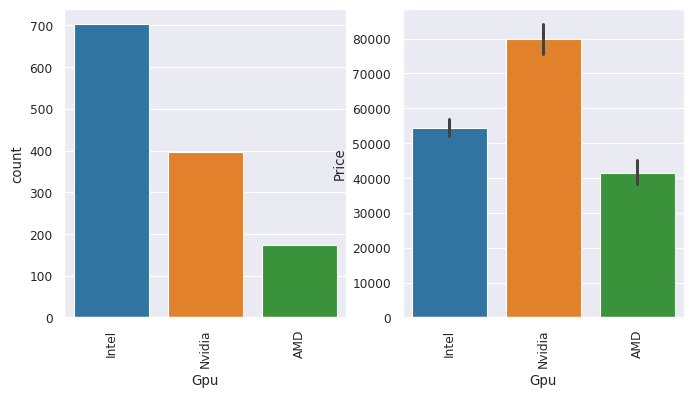

In [59]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(8,4))
sns.set_style("darkgrid")
sns.set_context("paper")
sns.countplot(x='Gpu',data=df,order=df['Gpu'].value_counts().index,palette=sns.color_palette("tab10"),ax=ax0)
ax0.set_xticklabels(df['Gpu'].value_counts().index,rotation=90)
sns.barplot(x='Gpu',y="Price",order=df['Gpu'].value_counts().index,data=df,palette=sns.color_palette("tab10"),ax=ax1)
ax1.set_xticklabels(df['Gpu'].value_counts().index,rotation=90)
#plt.yticks([0,20000,40000,60000,80000],['0K','20K','40K','60K','80K'])
plt.show()

#### Intel and Nvidia seem to be offering the most in the market.

### Operating system

In [60]:
df['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

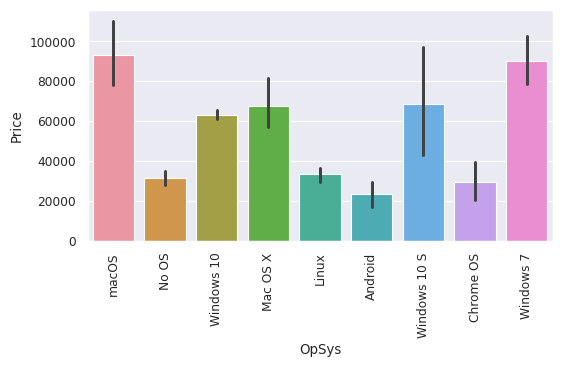

In [61]:
fig,ax=plt.subplots(1,1,figsize=(6,3))
sns.barplot(x=df['OpSys'],y=df['Price'],ax=ax)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
#Categorizing into three  categories i.e windows,mac and others
def my_func(x):
    if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    elif x == 'macOS' or x == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [63]:
df['OpSys']=df['OpSys'].apply(my_func)

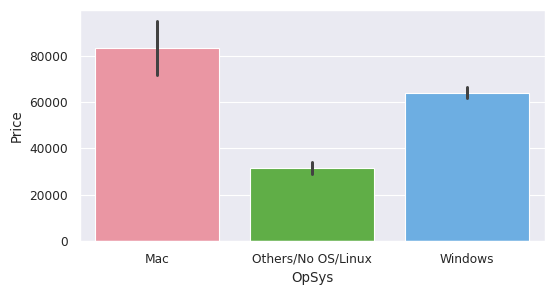

In [64]:
fig,ax=plt.subplots(1,1,figsize=(6,3))
sns.barplot(x=df['OpSys'],y=df['Price'],ax=ax)
plt.show()

#### Mac in general is always at a higher price thatn any other os

### Weight

/tmp/ipykernel_20/1949695505.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"],color='red')


<Axes: xlabel='Weight', ylabel='Density'>

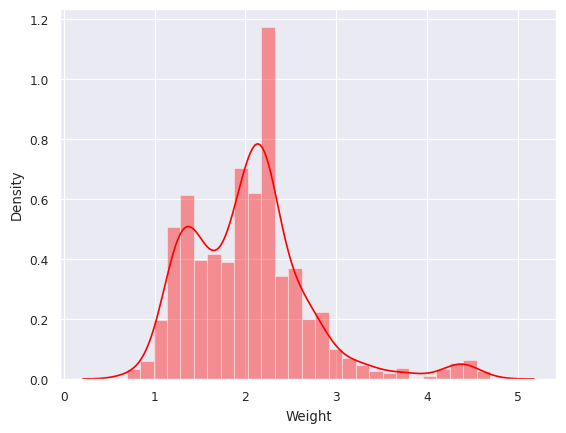

In [65]:
sns.set_style("darkgrid")
sns.distplot(df["Weight"],color='red')

([<matplotlib.axis.YTick at 0x7efd682ba4a0>,
 [Text(0, 0, '0K'),
  Text(0, 50000, '50K'),
  Text(0, 100000, '100K'),
  Text(0, 150000, '150K'),
  Text(0, 200000, '200K'),
  Text(0, 250000, '250K'),
  Text(0, 300000, '300K')])

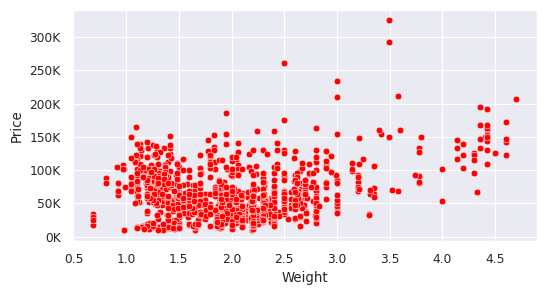

In [66]:
fig=plt.subplots(1,1,figsize=(6,3))
sns.scatterplot(x='Weight',y="Price",data=df,color='red')
plt.yticks([0,50000,100000,150000,200000,250000,300000],['0K','50K','100K','150K','200K','250K','300K'])

#### Price seems to be weakly linearly correlated with weight/

#### Final correlations

In [67]:
df.corr()['Price']


/tmp/ipykernel_20/2894258535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.739996
Weight           0.211667
Price            1.000000
Touchscreen      0.190382
IPS              0.251514
ppi              0.471481
HDD             -0.098481
SSD              0.669808
Hybrid           0.022490
Flash_Storage   -0.036712
Name: Price, dtype: float64

/tmp/ipykernel_20/1850165383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, linewidth=.5)#cmap="crest"


<Axes: >

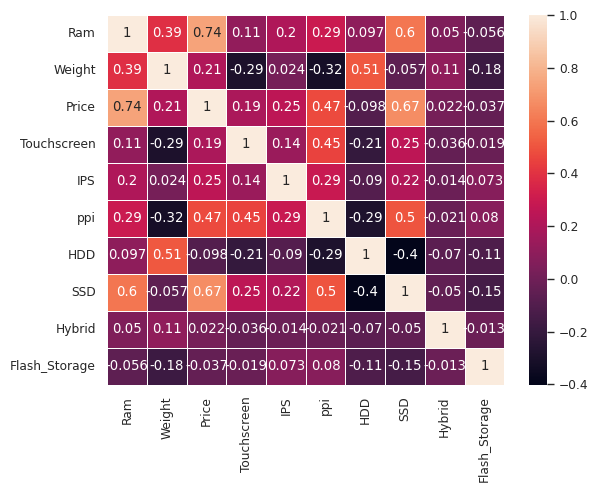

In [68]:
sns.heatmap(df.corr(),annot=True, linewidth=.5)#cmap="crest"

/tmp/ipykernel_20/834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

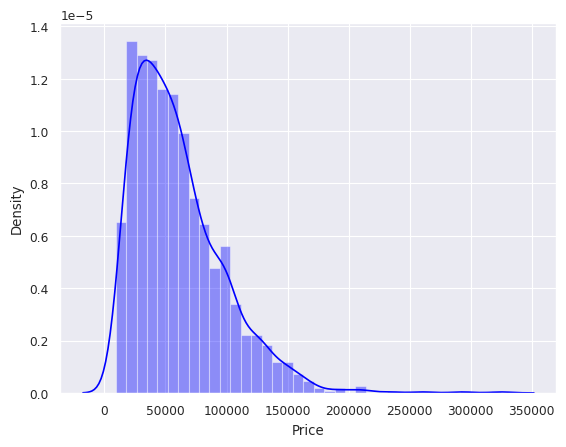

In [69]:
sns.distplot(df['Price'])

#### Since Price is a right skewed distribution,we will take a log of it.

/tmp/ipykernel_20/3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

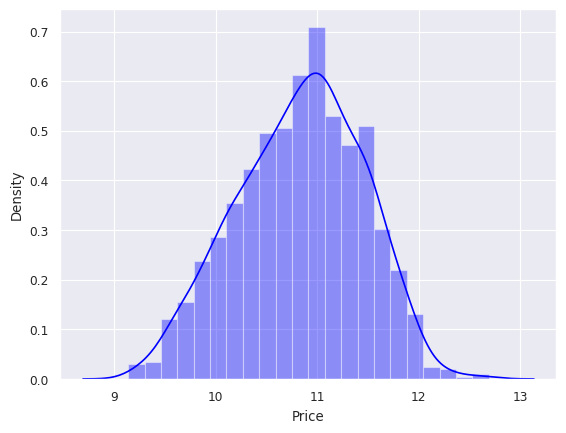

In [70]:
sns.distplot(np.log(df['Price']))

In [71]:
X=df.drop(columns="Price")
y=np.log(df['Price'])

## Modelling

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=4)

In [74]:
df.keys()

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'IPS', 'ppi', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage'],
      dtype='object')

In [75]:
df.sample(1)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Hybrid,Flash_Storage
22,HP,Notebook,AMD Processor,4,AMD,Others/No OS/Linux,1.86,13746.24,0,0,100.45467,500,0,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1273 non-null   object 
 1   TypeName       1273 non-null   object 
 2   Cpu            1273 non-null   object 
 3   Ram            1273 non-null   int32  
 4   Gpu            1273 non-null   object 
 5   OpSys          1273 non-null   object 
 6   Weight         1273 non-null   float32
 7   Price          1273 non-null   float64
 8   Touchscreen    1273 non-null   int64  
 9   IPS            1273 non-null   int64  
 10  ppi            1273 non-null   float64
 11  HDD            1273 non-null   int64  
 12  SSD            1273 non-null   int64  
 13  Hybrid         1273 non-null   int64  
 14  Flash_Storage  1273 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(5)
memory usage: 149.2+ KB


### Linear Regression

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = LinearRegression()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8238666596763458
MAE 0.21150933533261876


### Cross-Validation

In [78]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_val_score(pipe1, X_train, y_train, cv=kfold, scoring='r2')

In [79]:
print(scores)
print(scores.mean())

[0.79940756 0.8508492  0.84279491 0.81784064 0.84967505 0.77077739
 0.81617042 0.75889016 0.82621098 0.82031517]
0.8152931488821604


### Ridge Regression

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = Ridge()

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


In [81]:
param_grid = {'step2__alpha':[0.0001,0.001,0.01,0.1,1,5,10,20]}
gcv_cv =GridSearchCV(pipe2, param_grid,scoring='r2',refit=True,cv=kfold,verbose=0)
ridge_reg = gcv_cv.fit(X_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [82]:
ridge_reg.best_params_

{'step2__alpha': 0.1}

In [83]:
ridge_reg.best_score_

0.8153414532020928

In [84]:
pd.DataFrame(ridge_reg.cv_results_)[['params','mean_test_score']].sort_values('mean_test_score',ascending=False)

,params,mean_test_score
3,{'step2__alpha': 0.1},0.815341
2,{'step2__alpha': 0.01},0.815303
1,{'step2__alpha': 0.001},0.815294
0,{'step2__alpha': 0.0001},0.815293
4,{'step2__alpha': 1},0.814274
5,{'step2__alpha': 5},0.810060
6,{'step2__alpha': 10},0.806736
7,{'step2__alpha': 20},0.801486


In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 =Ridge(alpha=0.1)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8243800234778799
MAE 0.21108773411694953


### Lasso Regression

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = Lasso()

pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [87]:
param_grid = {'step2__alpha':[0.0001,0.001,0.01,0.1,1,5,10,20]}
gcv_cv =GridSearchCV(pipe3, param_grid,scoring='r2',refit=True,cv=kfold,verbose=0)
lasso_reg = gcv_cv.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [88]:
pd.DataFrame(lasso_reg.cv_results_)[['params','mean_test_score']].sort_values('mean_test_score',ascending=False)

,params,mean_test_score
0,{'step2__alpha': 0.0001},0.815274
1,{'step2__alpha': 0.001},0.805553
2,{'step2__alpha': 0.01},0.776413
3,{'step2__alpha': 0.1},0.577908
4,{'step2__alpha': 1},0.485710
5,{'step2__alpha': 5},0.442042
6,{'step2__alpha': 10},0.432156
7,{'step2__alpha': 20},0.393386


In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 =Lasso(alpha=0.0001)

pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe3.fit(X_train,y_train)

y_pred = pipe3.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8246069390605778
MAE 0.21158171552887534


### Summary
#### Lasso Regression with alpha =0.0001 ssems to be the best model with accuracy of 82.4%.
#### Notebooks of non-touchscreen type(non-IPS panel) from companies like  Dell and Lenovo seem to be the most popular. 
#### Intel core i7 with 8GB RAM,256GB SSD, and Intel GPU has high demand.
